In [1]:
import numpy as np
import tensorflow as tf
import tensorflow
from tensorflow import keras
from keras import layers
from tensorflow.keras.utils import plot_model
import pandas as pd
import matplotlib.pyplot as plt
from keras import regularizers, optimizers
from keras.layers import Dense, Dropout, Input
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError,MeanSquaredError
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import os

In [2]:
ewt_signal_length = 30
n_levels = 10
memory_units = int(32)
batchsize = 32

In [3]:
def custom_layer1(tensor):
  return tensor[:,0,:]
def custom_layer2(tensor):
  return tensor[:,1,:]
def custom_layer3(tensor):
  return tensor[:,2,:]
def custom_layer4(tensor):
  return tensor[:,3,:]
def custom_layer5(tensor):
  return tensor[:,4,:]
def custom_layer6(tensor):
  return tensor[:,5,:]
def custom_layer7(tensor):
  return tensor[:,6,:]
def custom_layer8(tensor):
  return tensor[:,7,:]
def custom_layer9(tensor):
  return tensor[:,8,:]
def custom_layer10(tensor):
  return tensor[:,9,:]

In [4]:

input = keras.Input(shape = (n_levels,ewt_signal_length))
input_data_model_1 = tensorflow.keras.layers.Lambda(custom_layer1, name="lambda_layer1")(input)
input_data_model_1 = layers.Reshape((1,ewt_signal_length))(input_data_model_1)
input_data_model_2 = tensorflow.keras.layers.Lambda(custom_layer2, name="lambda_layer2")(input)
input_data_model_2 = layers.Reshape((1,ewt_signal_length))(input_data_model_2)
input_data_model_3 = tensorflow.keras.layers.Lambda(custom_layer3, name="lambda_layer3")(input)
input_data_model_3 = layers.Reshape((1,ewt_signal_length))(input_data_model_3)
input_data_model_4 = tensorflow.keras.layers.Lambda(custom_layer4, name="lambda_layer4")(input)
input_data_model_4 = layers.Reshape((1,ewt_signal_length))(input_data_model_4)
input_data_model_5 = tensorflow.keras.layers.Lambda(custom_layer5, name="lambda_layer5")(input)
input_data_model_5 = layers.Reshape((1,ewt_signal_length))(input_data_model_5)
input_data_model_6 = tensorflow.keras.layers.Lambda(custom_layer6, name="lambda_layer6")(input)
input_data_model_6 = layers.Reshape((1,ewt_signal_length))(input_data_model_6)
input_data_model_7 = tensorflow.keras.layers.Lambda(custom_layer7, name="lambda_layer7")(input)
input_data_model_7 = layers.Reshape((1,ewt_signal_length))(input_data_model_7)
input_data_model_8 = tensorflow.keras.layers.Lambda(custom_layer8, name="lambda_layer8")(input)
input_data_model_8 = layers.Reshape((1,ewt_signal_length))(input_data_model_8)
input_data_model_9 = tensorflow.keras.layers.Lambda(custom_layer9, name="lambda_layer9")(input)
input_data_model_9 = layers.Reshape((1,ewt_signal_length))(input_data_model_9)
input_data_model_10 = tensorflow.keras.layers.Lambda(custom_layer10, name="lambda_layer10")(input)
input_data_model_10 = layers.Reshape((1,ewt_signal_length))(input_data_model_10)
for i in range(n_levels):
  globals()[f"output_{i+1}"] = layers.BatchNormalization(scale = False,center = False)(globals()[f"input_data_model_{i+1}"])

outputs_models = layers.concatenate([output_1, output_2,output_3,output_4,output_5,output_6,output_7,output_8,output_9,output_10])
outputs_models = layers.LayerNormalization(scale = False,center = False)(outputs_models)
outputs_models = layers.BatchNormalization(scale = False,center = False)(outputs_models)
# final_output = layers.Dense(1)(outputs_models)
z = layers.Reshape((1,n_levels))(outputs_models)
z = layers.LSTM(memory_units,return_sequences = True)(z)
z = layers.LSTM(int(memory_units/2))(z)
final_output = layers.Dense(1,activation = 'linear')(z)
#z = layers.RNN(layers.LSTMCell(32),return_sequences = True)(outputs_models)
# z = layers.RNN(layers.LSTMCell(16))(z)
# final_output = layers.Dense(1)(z)
model = keras.Model(inputs = input,outputs = final_output,name = 'my_model')


ValueError: ignored

In [ ]:
model.summary()

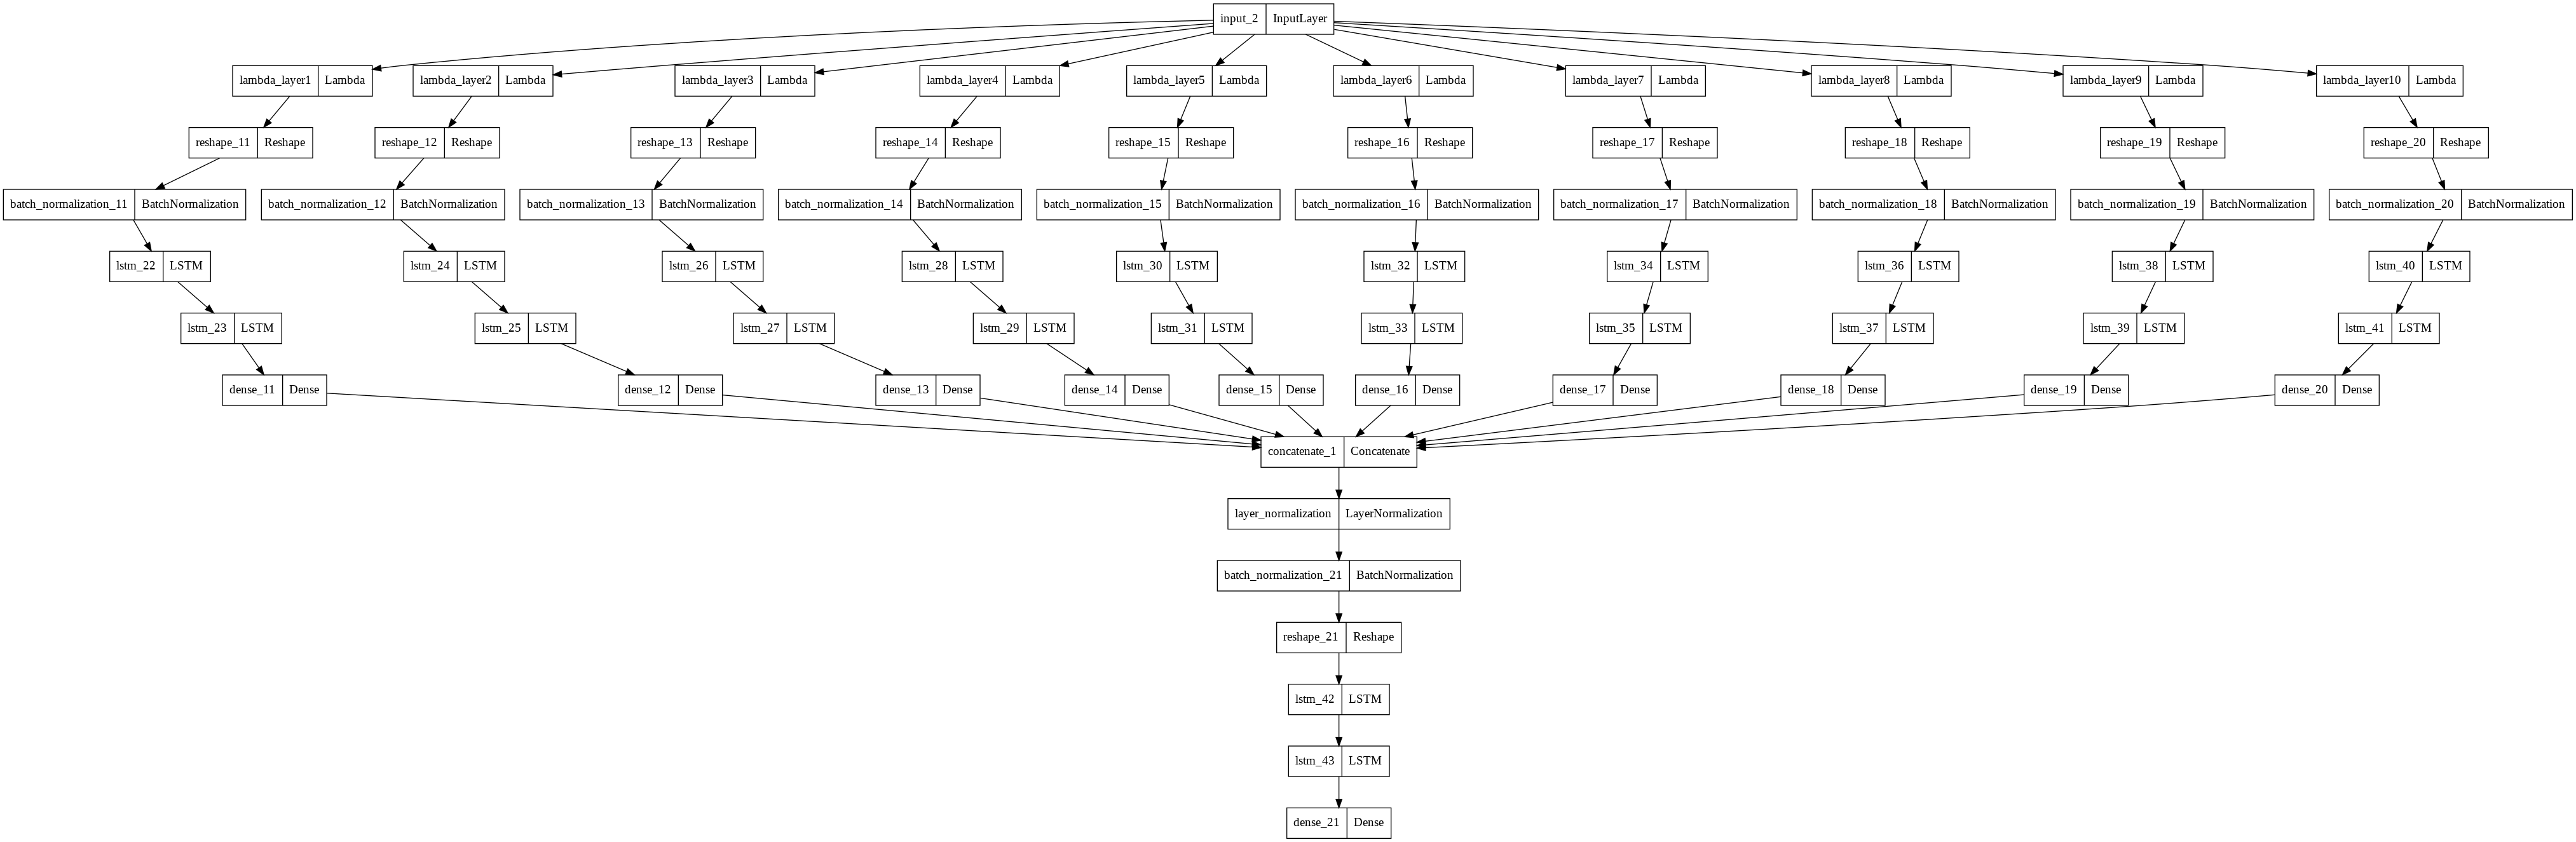

In [ ]:
plot_model(model)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('drive/MyDrive')

In [ ]:
x = np.load('x_n1_10ms_cwt.npy')
y = np.load('y_n1_10ms_cwt.npy')

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.85)

In [ ]:
optimizer = keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer = optimizer,metrics = ['RootMeanSquaredError','MeanSquaredError','accuracy']) # Try SGD, adam, adagrad and compare!!!
file = 'model_best_10s.h5'
es = EarlyStopping(monitor='val_loss', mode='min', verbose=5, patience=10)
checkpoint = ModelCheckpoint(filepath=file, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint,es]


In [ ]:
history = model.fit(x_train,y_train, epochs=700, batch_size=batchsize, verbose=2,validation_data = (x_test,y_test), callbacks = callbacks)

Epoch 1/700

Epoch 1: val_loss improved from inf to 0.48828, saving model to model_best_10s.h5
3480/3480 - 130s - loss: 0.5006 - root_mean_squared_error: 0.7076 - mean_squared_error: 0.5006 - accuracy: 0.0000e+00 - val_loss: 0.4883 - val_root_mean_squared_error: 0.6988 - val_mean_squared_error: 0.4883 - val_accuracy: 0.0000e+00 - 130s/epoch - 37ms/step
Epoch 2/700

Epoch 2: val_loss did not improve from 0.48828
3480/3480 - 76s - loss: 0.4923 - root_mean_squared_error: 0.7017 - mean_squared_error: 0.4923 - accuracy: 0.0000e+00 - val_loss: 0.4949 - val_root_mean_squared_error: 0.7035 - val_mean_squared_error: 0.4949 - val_accuracy: 0.0000e+00 - 76s/epoch - 22ms/step
Epoch 3/700

Epoch 3: val_loss improved from 0.48828 to 0.48757, saving model to model_best_10s.h5
3480/3480 - 79s - loss: 0.4888 - root_mean_squared_error: 0.6992 - mean_squared_error: 0.4888 - accuracy: 0.0000e+00 - val_loss: 0.4876 - val_root_mean_squared_error: 0.6983 - val_mean_squared_error: 0.4876 - val_accuracy: 0.000

KeyboardInterrupt: ignored

In [ ]:

input = keras.Input(shape = (n_levels,ewt_signal_length))
input_data_model_1 = tensorflow.keras.layers.Lambda(custom_layer1, name="lambda_layer1")(input)
input_data_model_1 = layers.Reshape((1,ewt_signal_length))(input_data_model_1)
input_data_model_2 = tensorflow.keras.layers.Lambda(custom_layer2, name="lambda_layer2")(input)
input_data_model_2 = layers.Reshape((1,ewt_signal_length))(input_data_model_2)
input_data_model_3 = tensorflow.keras.layers.Lambda(custom_layer3, name="lambda_layer3")(input)
input_data_model_3 = layers.Reshape((1,ewt_signal_length))(input_data_model_3)
input_data_model_4 = tensorflow.keras.layers.Lambda(custom_layer4, name="lambda_layer4")(input)
input_data_model_4 = layers.Reshape((1,ewt_signal_length))(input_data_model_4)
input_data_model_5 = tensorflow.keras.layers.Lambda(custom_layer5, name="lambda_layer5")(input)
input_data_model_5 = layers.Reshape((1,ewt_signal_length))(input_data_model_5)
input_data_model_6 = tensorflow.keras.layers.Lambda(custom_layer6, name="lambda_layer6")(input)
input_data_model_6 = layers.Reshape((1,ewt_signal_length))(input_data_model_6)
input_data_model_7 = tensorflow.keras.layers.Lambda(custom_layer7, name="lambda_layer7")(input)
input_data_model_7 = layers.Reshape((1,ewt_signal_length))(input_data_model_7)
input_data_model_8 = tensorflow.keras.layers.Lambda(custom_layer8, name="lambda_layer8")(input)
input_data_model_8 = layers.Reshape((1,ewt_signal_length))(input_data_model_8)
input_data_model_9 = tensorflow.keras.layers.Lambda(custom_layer9, name="lambda_layer9")(input)
input_data_model_9 = layers.Reshape((1,ewt_signal_length))(input_data_model_9)
input_data_model_10 = tensorflow.keras.layers.Lambda(custom_layer10, name="lambda_layer10")(input)
input_data_model_10 = layers.Reshape((1,ewt_signal_length))(input_data_model_10)
for i in range(n_levels):
  globals()[f"input_data_model_{i+1}"] = layers.BatchNormalization(scale = False,center = False)(globals()[f"input_data_model_{i+1}"])
  globals()[f"x{i+1}"]= layers.Bidirectional(layers.LSTM(memory_units,return_sequences = True))(globals()[f"input_data_model_{i+1}"])
  globals()[f"x{i+1}"] = layers.Bidirectional(layers.LSTM(int(memory_units/2)))(globals()[f"x{i+1}"])
  globals()[f"output_{i+1}"] = layers.Dense(1,activation = 'linear')(globals()[f"x{i+1}"])

outputs_models = layers.concatenate([output_1, output_2,output_3,output_4,output_5,output_6,output_7,output_8,output_9,output_10])
outputs_models = layers.LayerNormalization(scale = False,center = False)(outputs_models)
# final_output = layers.Dense(1)(outputs_models)
z = layers.Reshape((1,n_levels))(outputs_models)
z = layers.Bidirectional(layers.LSTM(memory_units,return_sequences = True))(z)
z = layers.Bidirectional(layers.LSTM(int(memory_units/2)))(z)
final_output = layers.Dense(1,activation = 'linear')(z)
#z = layers.RNN(layers.LSTMCell(32),return_sequences = True)(outputs_models)
# z = layers.RNN(layers.LSTMCell(16))(z)
# final_output = layers.Dense(1)(z)
model = keras.Model(inputs = input,outputs = final_output,name = 'my_model')


In [ ]:
model.summary()

Model: "my_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 10, 30)]     0           []                               
                                                                                                  
 lambda_layer1 (Lambda)         (None, 30)           0           ['input_5[0][0]']                
                                                                                                  
 lambda_layer2 (Lambda)         (None, 30)           0           ['input_5[0][0]']                
                                                                                                  
 lambda_layer3 (Lambda)         (None, 30)           0           ['input_5[0][0]']                
                                                                                           

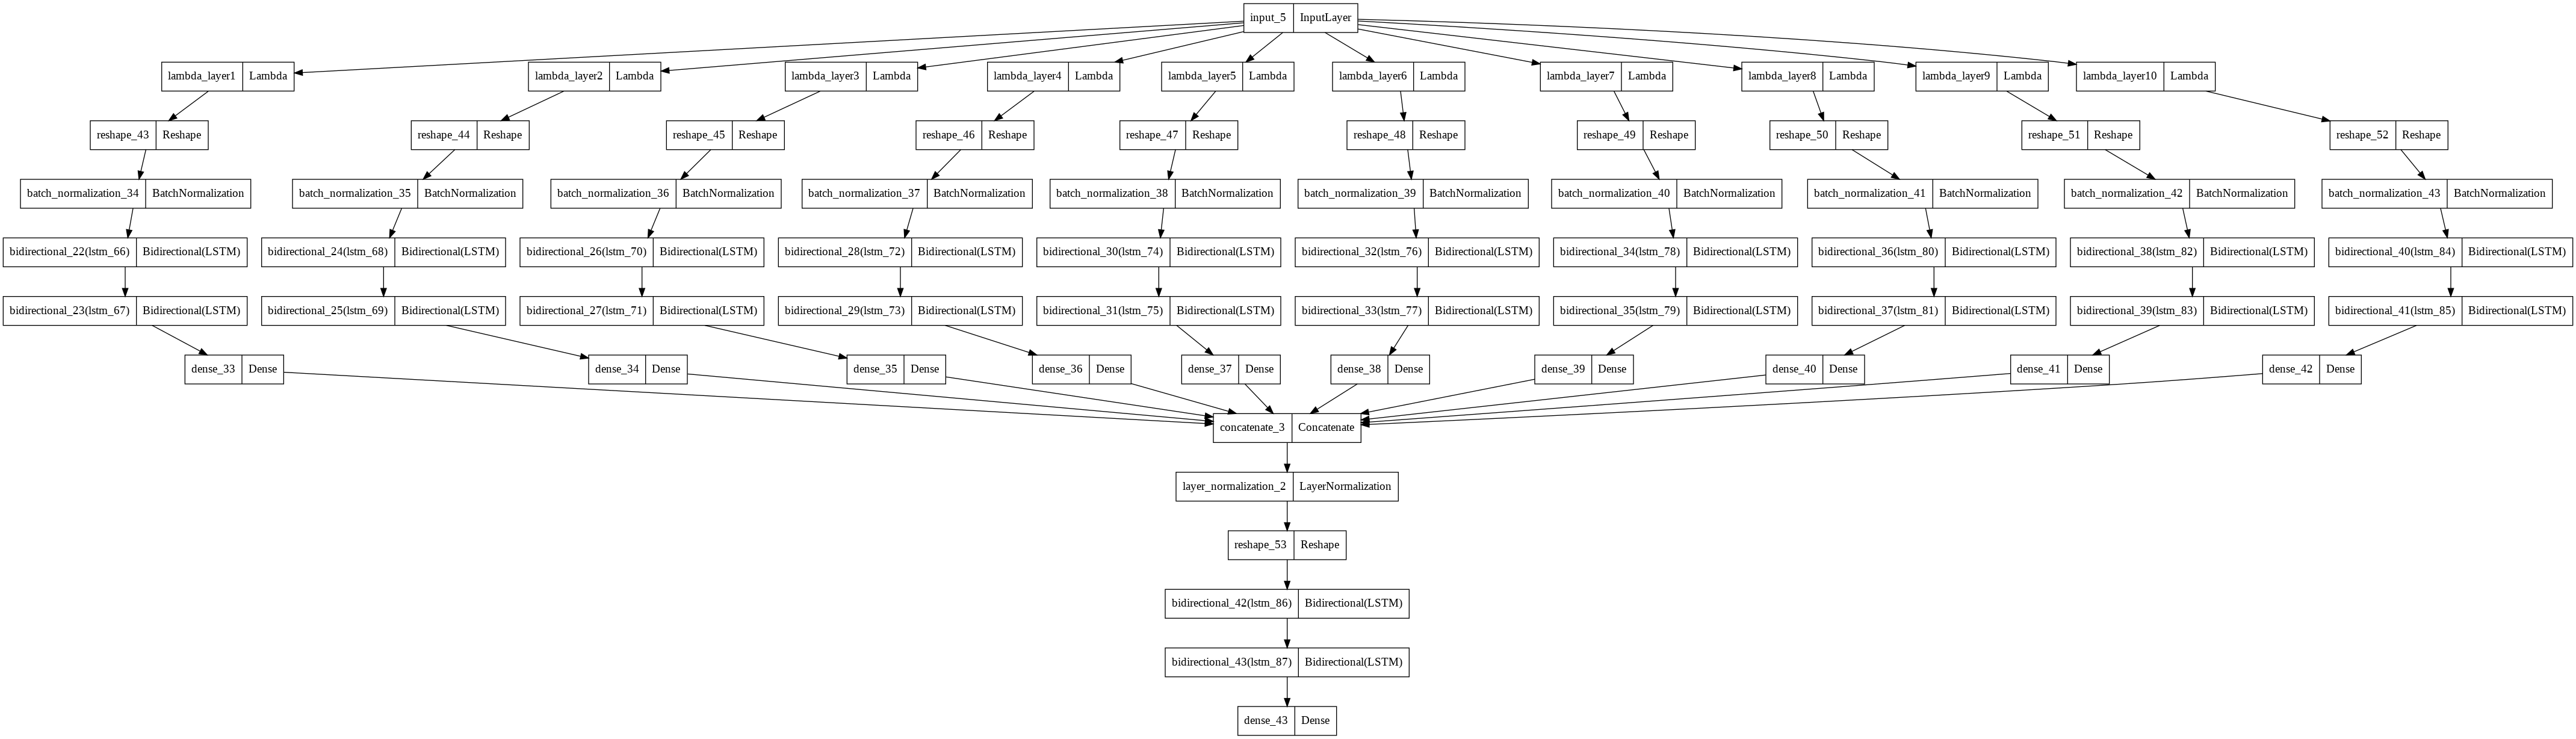

In [ ]:
plot_model(model)

In [ ]:
optimizer = keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer = optimizer,metrics = ['RootMeanSquaredError','MeanSquaredError']) # Try SGD, adam, adagrad and compare!!!
file = 'model_best_10s_bi.h5'
es = EarlyStopping(monitor='val_loss', mode='min', verbose=5, patience=20)
checkpoint = ModelCheckpoint(filepath=file, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint,es]


In [ ]:
history = model.fit(x_train,y_train, epochs=700, batch_size=128, verbose=1,validation_data = (x_test,y_test), callbacks = callbacks)

Epoch 1/700
869/870 [============================>.] - ETA: 0s - loss: 0.4911 - root_mean_squared_error: 0.7008 - mean_squared_error: 0.4911
Epoch 1: val_loss improved from inf to 0.49002, saving model to model_best_10s_bi.h5
870/870 [==============================] - 155s 79ms/step - loss: 0.4911 - root_mean_squared_error: 0.7008 - mean_squared_error: 0.4911 - val_loss: 0.4900 - val_root_mean_squared_error: 0.7000 - val_mean_squared_error: 0.4900
Epoch 2/700
869/870 [============================>.] - ETA: 0s - loss: 0.4842 - root_mean_squared_error: 0.6958 - mean_squared_error: 0.4842
Epoch 2: val_loss improved from 0.49002 to 0.48760, saving model to model_best_10s_bi.h5
870/870 [==============================] - 51s 58ms/step - loss: 0.4842 - root_mean_squared_error: 0.6958 - mean_squared_error: 0.4842 - val_loss: 0.4876 - val_root_mean_squared_error: 0.6983 - val_mean_squared_error: 0.4876
Epoch 3/700
870/870 [==============================] - ETA: 0s - loss: 0.4820 - root_mean_squ

In [ ]:
# segementing the data didn't help in optimising the model